<a href="https://colab.research.google.com/github/hyphen-ani/Deep-Learning-Pytorch/blob/main/Deep_Learning_NN_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification With PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options.)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

## 1. Make Classification Data & Get It Ready - Binary Classification

In [3]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 Samples of X : {X[:5]}")
print(f"First 5 Samples of y : {y[:5]}")

First 5 Samples of X : [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 Samples of y : [1 1 1 1 0]


In [6]:
# Make Dataframe of Circles

import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "label" : y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


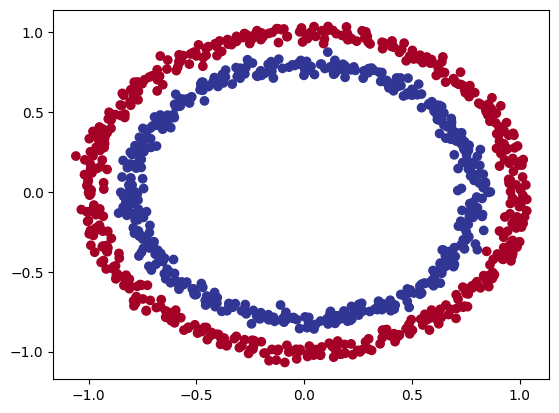

In [7]:
# Visualizing

plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

**Note:** The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundaementals.

## 1.1 Check Input & Output Shapes

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}")
print(f"Values for one sample of y: {y_sample}")

Values for one sample of X: [0.75424625 0.23148074]
Values for one sample of y: 1


### 1.2 Turn data into tensors and create train test split

In [10]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [12]:
# Split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Builing a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on a GPU if there is one
2. Construct a model (by subclassing nn.Module)
3. Define loss function and optimizer
4. Create a training and testing loop
5. Make predictions and evaluate model

In [13]:
from torch import nn
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:

1. Subclass `nn.Module()`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass of our model
4. Instantiate an instance of our model class and send it to the target device

In [15]:
# 1. Contruct a model that subclasses nn.Module
class CircleModelV10(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear Layer capable of handling the shapes of our data

    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

    # 3. Forward Pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # - x -> Linear_1 -> Linear_2 -> Output

# 4. Instantiate an instance of our model class and send it to the target device

model_version_1 = CircleModelV10().to(device)
model_version_1.state_dict()
model_version_1

CircleModelV10(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [51]:
# Let's replicate the model above using nn.Sequential - Simpler to make neural networks

model_version_1_updated = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_version_1_updated.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.2537, -0.3541],
                      [ 0.1677,  0.1290],
                      [ 0.6368, -0.5314],
                      [ 0.5908,  0.3773],
                      [ 0.1564, -0.1420]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1887,  0.1522,  0.3677,  0.6849, -0.3859], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0173, -0.0135,  0.3016,  0.3613,  0.2465]], device='cuda:0')),
             ('1.bias', tensor([-0.1533], device='cuda:0'))])

In [52]:
# Making Predictions
with torch.inference_mode():
  untrained_preds = model_version_1_updated(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 Predictions: {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 Labels: {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 Predictions: tensor([[-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [-0.],
        [0.]], device='cuda:0')

First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0')


### 2.1 Setup Loss Function & Optimizer

Which loss function and optimizer should we use?

Regression: MAE or MSE (Mean Absolute Error or Mean Squared Error)
Classification: Binary Cross Entropy (BCE) or Categorical Cross Entropy (CE)

Loss function measures how well the models prediction or inference is

And for optimizers, most common are SGD and Adam

* For the loss function we're going to use `torch.nn.BCEwithLogitsLoss`

In [53]:
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid Activation Built In
optimizer = torch.optim.SGD(params=model_version_1_updated.parameters(),
                            lr=0.1)

In [54]:
# Calculate Accuracy

def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3.1 Training Model

Going from raw logits -> Prediction Probabilities(Passing through AFn) -> Prediction Labels

We can convert these **logits** into probabilities by passing them through the (sigmoid activation function for BCE). and softmax for multiclass classification

Then we can convert our models prediction probabilities to **prediction labels** by rounding them or taking the `argmax()`


In [55]:
# View the first 5 outputs of the forward pass on the test data
model_version_1_updated.eval()
with torch.inference_mode():
  y_logits = model_version_1_updated(X_test.to(device))[:5]
y_logits

tensor([[-0.1085],
        [ 0.0473],
        [-0.1880],
        [-0.0873],
        [ 0.3338]], device='cuda:0')

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [56]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4729],
        [0.5118],
        [0.4531],
        [0.4782],
        [0.5827]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them

* `y_pred_prob` >= 0.5, `y=1`
* `y_pred_prob` < 0.5, `y=0`

In [57]:
# Find the prediction labels
y_pred = torch.round(y_pred_prob)
y_pred_labels = torch.round(torch.sigmoid(model_version_1_updated(X_test.to(device))[:5]))

#Check for equality
print(torch.eq(y_pred.squeeze(), y_pred_labels.squeeze()))

y_pred.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 1., 0., 0., 1.], device='cuda:0')

In [58]:
## 3.2 Building the training & testing loop

torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training & evaluation loop
for epoch in range(epochs):
  model_version_1_updated.train()

  #1. Forward Pass
  y_logits = model_version_1_updated(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy(y_true=y_train, y_pred=y_pred)

  #3. Optimizer Zero Grad
  optimizer.zero_grad()

  #4. Loss Backward
  loss.backward()

  #5. Optimizer Step
  optimizer.step()

  ## Testing
  model_version_1_updated.eval()
  with torch.inference_mode():
    test_logits = model_version_1_updated(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70430, Accuracy: 50.88% | Test Loss: 0.70705, Test Accuracy: 50.00%
Epoch: 10 | Loss: 0.70070, Accuracy: 50.12% | Test Loss: 0.70359, Test Accuracy: 52.00%
Epoch: 20 | Loss: 0.69879, Accuracy: 49.50% | Test Loss: 0.70173, Test Accuracy: 52.50%
Epoch: 30 | Loss: 0.69758, Accuracy: 49.75% | Test Loss: 0.70057, Test Accuracy: 51.00%
Epoch: 40 | Loss: 0.69673, Accuracy: 49.88% | Test Loss: 0.69976, Test Accuracy: 50.00%
Epoch: 50 | Loss: 0.69608, Accuracy: 49.50% | Test Loss: 0.69915, Test Accuracy: 50.50%
Epoch: 60 | Loss: 0.69557, Accuracy: 49.88% | Test Loss: 0.69868, Test Accuracy: 49.00%
Epoch: 70 | Loss: 0.69516, Accuracy: 49.75% | Test Loss: 0.69830, Test Accuracy: 50.00%
Epoch: 80 | Loss: 0.69483, Accuracy: 50.00% | Test Loss: 0.69800, Test Accuracy: 48.50%
Epoch: 90 | Loss: 0.69455, Accuracy: 50.25% | Test Loss: 0.69774, Test Accuracy: 49.50%
Epoch: 100 | Loss: 0.69432, Accuracy: 49.88% | Test Loss: 0.69752, Test Accuracy: 49.50%
Epoch: 110 | Loss: 0.69413, Accu

OrderedDict([('0.weight',
              tensor([[-0.3979,  0.1345],
                      [ 0.1372,  0.5034],
                      [-0.3918, -0.0833],
                      [-0.0499, -0.1517],
                      [ 0.1721, -0.4899]])),
             ('0.bias', tensor([-0.3131, -0.6226, -0.5476, -0.5815,  0.2918])),
             ('1.weight',
              tensor([[ 0.0265,  0.3076,  0.2041, -0.3384,  0.2918]])),
             ('1.bias', tensor([0.0306]))])

## 4. Make predictions and evaluate the model

From the metrics it looks like our model is not learning anything...
Inspecting the data and the predictions

In [59]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
  print("Download complete")

helper_functions.py already exists, skipping download...


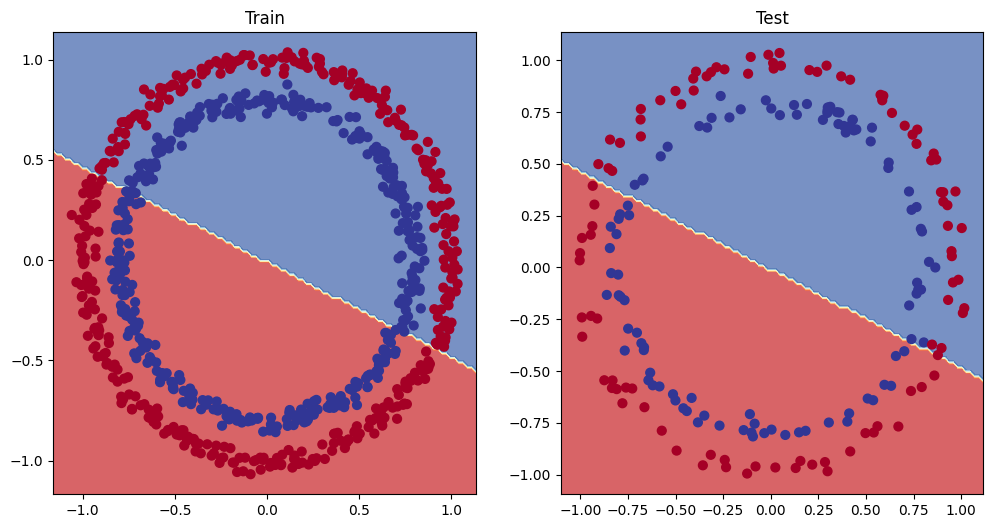

In [60]:
from helper_functions import plot_predictions, plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_version_1_updated, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_version_1_updated, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers
* Increase the number of hidden units
* Fit for longer
* Change the activation function
* Change the learning rate
* Change the loss function

These options are all from a models perspective because they deal directly with the model, rather than the data

And becuase these options are all values we can change, they are referred as **hyperparametes**

In [61]:
class CircleModelV1_Upgraded(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1_upgraded = CircleModelV1_Upgraded().to(device)
model_1_upgraded.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2335,  0.3060],
                      [-0.2457,  0.4306],
                      [-0.0487, -0.5879],
                      [ 0.5275,  0.6213],
                      [-0.3017, -0.1102],
                      [-0.3030,  0.2595],
                      [-0.5654,  0.4992],
                      [ 0.1151, -0.4444],
                      [ 0.5995, -0.3191],
                      [-0.2258,  0.3377]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2063, -0.4089, -0.6315,  0.4555, -0.0492, -0.2060, -0.4734, -0.5157,
                       0.2285, -0.2952], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.2127, -0.2123, -0.1596,  0.1579, -0.1287,  0.0595,  0.0896, -0.2968,
                        0.0112, -0.2346],
                      [-0.0494, -0.1478,  0.0634,  0.1722,  0.2244,  0.1856,  0.0382, -0.2146,
                        0.0163,  0.2580],
                      [-0.0593, -0.115

In [ ]:
# Create a Loss Function

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1_upgraded.parameters(), lr=0.1)